In [91]:
import pandas as pd

In [130]:
data = pd.read_csv('JPM.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
print(data)

                 Close
Date                  
2014-01-14   57.740002
2014-01-15   59.490002
2014-01-16   58.990002
2014-01-17   58.110001
2014-01-21   58.169998
...                ...
2020-11-09  116.900002
2020-11-10  116.519997
2020-11-11  114.779999
2020-11-12  113.370003
2020-11-13  114.080002

[1723 rows x 1 columns]


In [131]:
import matplotlib.pyplot as plt

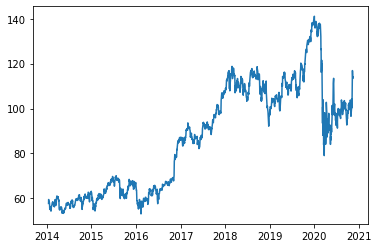

In [132]:
plt.plot(data['Close'])
plt.show()

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.05305615]
 [0.07293799]
 [0.06725747]
 ...
 [0.70109068]
 [0.68507164]
 [0.69313798]]


In [135]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [136]:
import numpy as np

In [137]:
def create_dataset(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
    return np.array(data_x), np.array(data_y)

In [138]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x)

[[0.05305615]
 [0.07293799]
 [0.06725747]
 ...
 [0.62304029]
 [0.60543062]
 [0.59281984]]


In [139]:
print(train_x.shape)

(1204, 1)


In [140]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x)

[[[0.05305615]]

 [[0.07293799]]

 [[0.06725747]]

 ...

 [[0.62304029]]

 [[0.60543062]]

 [[0.59281984]]]


In [141]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [142]:
model = Sequential()
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

1204/1204 [==============================] - 2s 2ms/step - loss: 0.0150 - accuracy: 8.3056e-04
Keras model loss =  0.0009545594803057611
Keras model accuracy =  0.000830564764328301


In [144]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

print(train_predictions)

[[0.09620872]
 [0.10525194]
 [0.10259396]
 ...
 [0.64974463]
 [0.62957704]
 [0.6148337 ]]


In [145]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

print(train_predictions)

[[ 61.538292]
 [ 62.334274]
 [ 62.100323]
 ...
 [110.26051 ]
 [108.48537 ]
 [107.18766 ]]


In [146]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [147]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[
    len(train_predictions)+2+1:len(scaled_data)-1, :] = test_predictions

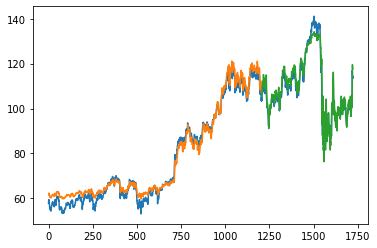

In [148]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()